<a href="https://colab.research.google.com/github/mukul2707/machine_learning/blob/master/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Logistic Regression***

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
data.head(50)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [0]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


(array([ 1.,  0.,  0.,  2.,  1.,  2.,  1.,  4.,  6.,  3.,  5.,  9.,  9.,
        14., 14., 12., 11., 21., 15., 13., 13., 29., 22., 17., 20., 15.,
        19., 20., 11., 11., 13.,  8., 12., 14., 33.]),
 array([2.26      , 2.30971429, 2.35942857, 2.40914286, 2.45885714,
        2.50857143, 2.55828571, 2.608     , 2.65771429, 2.70742857,
        2.75714286, 2.80685714, 2.85657143, 2.90628571, 2.956     ,
        3.00571429, 3.05542857, 3.10514286, 3.15485714, 3.20457143,
        3.25428571, 3.304     , 3.35371429, 3.40342857, 3.45314286,
        3.50285714, 3.55257143, 3.60228571, 3.652     , 3.70171429,
        3.75142857, 3.80114286, 3.85085714, 3.90057143, 3.95028571,
        4.        ]),
 <a list of 35 Patch objects>)

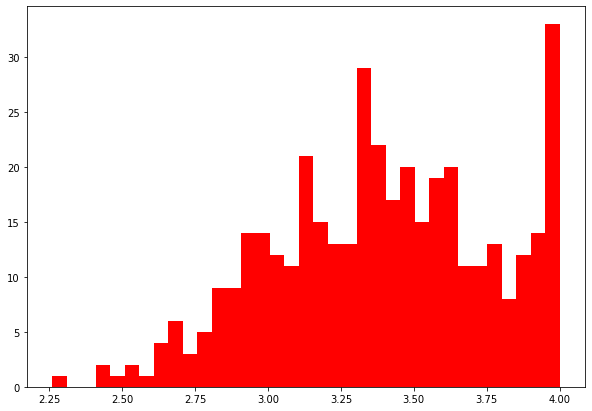

In [0]:
plt.figure(figsize=(10,7))
plt.hist(data['gpa'],bins=35,color = 'red')


(array([ 1.,  0.,  0.,  0.,  3.,  0.,  0.,  4.,  4.,  8., 11.,  0.,  7.,
        10., 14., 16., 21.,  0., 24., 27., 24., 29., 23.,  0., 30., 21.,
        24., 20., 22.,  0., 11., 11.,  5.,  5., 25.]),
 array([220.        , 236.57142857, 253.14285714, 269.71428571,
        286.28571429, 302.85714286, 319.42857143, 336.        ,
        352.57142857, 369.14285714, 385.71428571, 402.28571429,
        418.85714286, 435.42857143, 452.        , 468.57142857,
        485.14285714, 501.71428571, 518.28571429, 534.85714286,
        551.42857143, 568.        , 584.57142857, 601.14285714,
        617.71428571, 634.28571429, 650.85714286, 667.42857143,
        684.        , 700.57142857, 717.14285714, 733.71428571,
        750.28571429, 766.85714286, 783.42857143, 800.        ]),
 <a list of 35 Patch objects>)

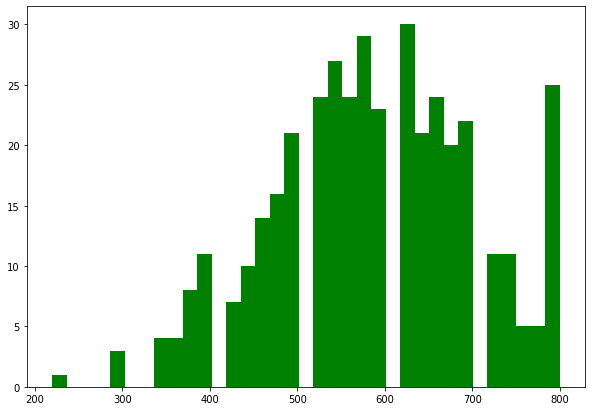

In [0]:
plt.figure(figsize=(10,7))
plt.hist(data['gre'],bins=35,color = 'green')

(array([273.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 127.]),
 array([0.        , 0.02857143, 0.05714286, 0.08571429, 0.11428571,
        0.14285714, 0.17142857, 0.2       , 0.22857143, 0.25714286,
        0.28571429, 0.31428571, 0.34285714, 0.37142857, 0.4       ,
        0.42857143, 0.45714286, 0.48571429, 0.51428571, 0.54285714,
        0.57142857, 0.6       , 0.62857143, 0.65714286, 0.68571429,
        0.71428571, 0.74285714, 0.77142857, 0.8       , 0.82857143,
        0.85714286, 0.88571429, 0.91428571, 0.94285714, 0.97142857,
        1.        ]),
 <a list of 35 Patch objects>)

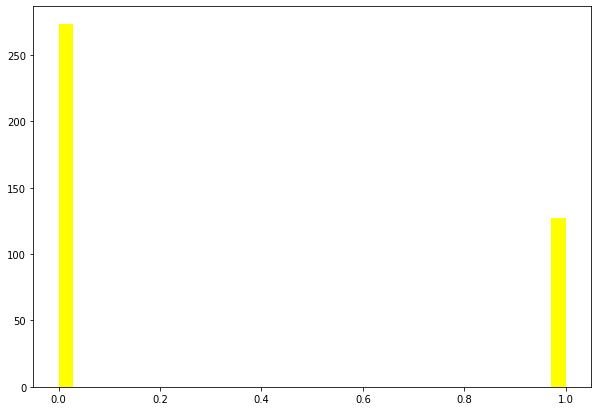

In [0]:
plt.figure(figsize=(10,7))
plt.hist(data['admit'],bins=35,color = 'yellow')

(array([ 61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 121.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  67.]),
 array([1.        , 1.08571429, 1.17142857, 1.25714286, 1.34285714,
        1.42857143, 1.51428571, 1.6       , 1.68571429, 1.77142857,
        1.85714286, 1.94285714, 2.02857143, 2.11428571, 2.2       ,
        2.28571429, 2.37142857, 2.45714286, 2.54285714, 2.62857143,
        2.71428571, 2.8       , 2.88571429, 2.97142857, 3.05714286,
        3.14285714, 3.22857143, 3.31428571, 3.4       , 3.48571429,
        3.57142857, 3.65714286, 3.74285714, 3.82857143, 3.91428571,
        4.        ]),
 <a list of 35 Patch objects>)

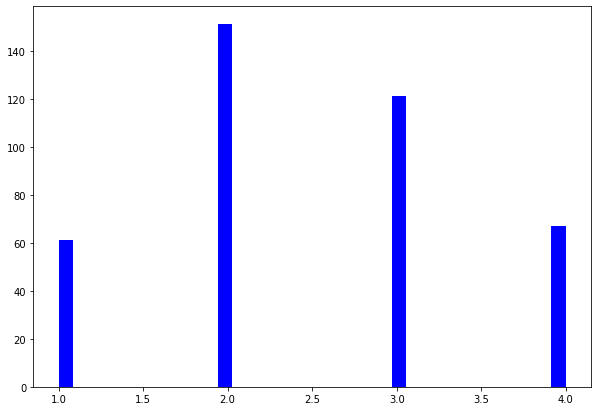

In [0]:
plt.figure(figsize=(10,7))
plt.hist(data['rank'],bins=35,color = 'blue')

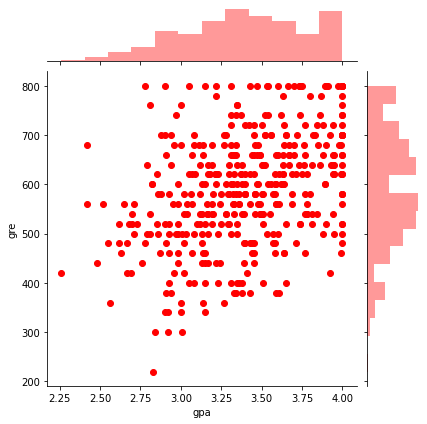

In [0]:
sns.jointplot(x='gpa' , y='gre',data=data , color = 'red')

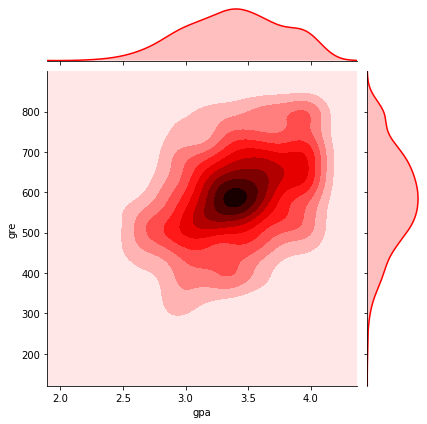

In [0]:
sns.jointplot(x='gpa' , y='gre',data=data , color = 'red',kind='kde')

In [0]:
dummy_rank = pd.get_dummies(data['rank'], prefix='rank')
dummy_rank.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [0]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline

X =data[['gre','gpa']]
y =data['admit']
print (X.shape)
print (y.shape)

(400, 2)
(400,)


In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 2)
(240,)
(160, 2)
(160,)


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)
prediction = model.predict(X_test)
prediction[1]

0

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       113
           1       0.11      0.02      0.04        47

    accuracy                           0.66       160
   macro avg       0.40      0.48      0.42       160
weighted avg       0.52      0.66      0.57       160



In [0]:
import pandas as pd
col = ['Index','col1','col2','col3','col4','col5','col6','col7','col8','col9','col10']
glass = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',col)

glass.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [0]:
glass.tail(10)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
947,x,o,x,o,x,x,o,x,o,negative
948,x,o,x,o,o,x,x,x,o,negative
949,x,o,o,o,x,x,x,x,o,negative
950,o,x,x,x,x,o,o,o,x,negative
951,o,x,x,x,o,o,x,o,x,negative
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative
956,o,o,x,x,x,o,o,x,x,negative
